##BaseLine 모델 공유

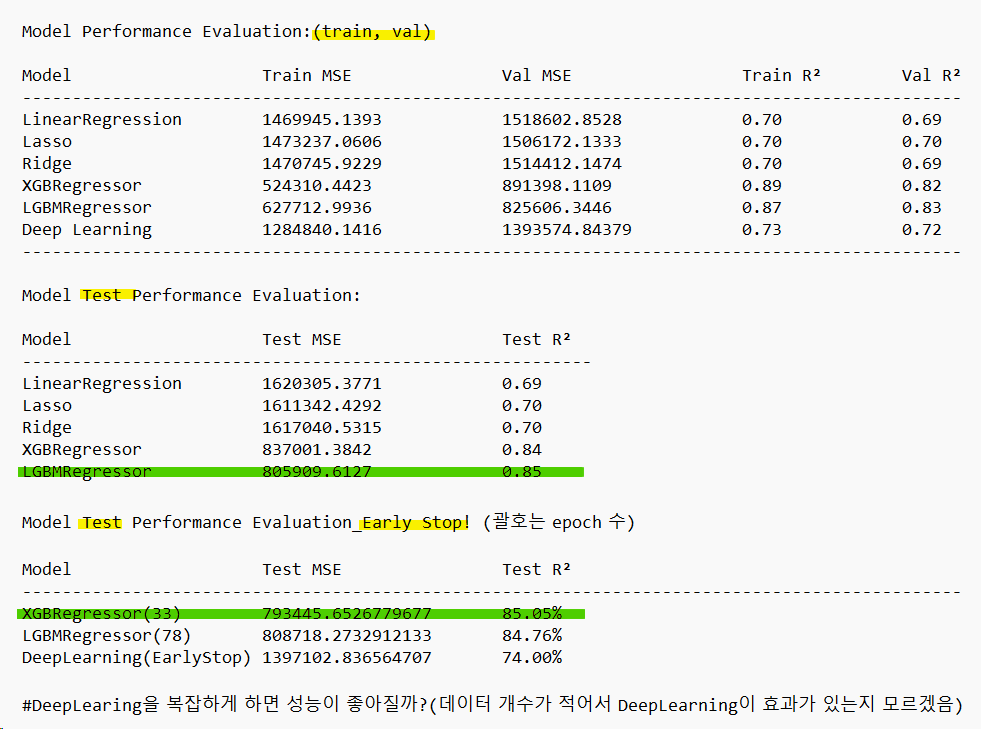

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer

In [ ]:
vif_inf = ["건설수주_건축(단위 백만원)", "건설수주_주택(단위 백만원)", "소비자물가지수 주택, 수도, 전기 및 연료",
            "S&P 500_change_rate", "NASDAQ_close" , "NASDAQ_change_rate", "DOW Jones_change_rate", "KRX300_change_rate", "KOSPI_change_rate"]

##vif를 통해서 제거해야할 열들을 추출함!

#VIF를 통해서 데이터 삭제해야할 것을 알았으니, 원본 데이터를 새로 부른다음에 X,y로 나눈 다음에 진행해보기!

In [ ]:
#data새로 불러오기 (X,y 나누기)
data = pd.read_csv("/content/drive/MyDrive/DAT학회/부동산-프로젝트/Raemian_final.csv")

In [ ]:
data = data.drop(columns = vif_inf)
data = data.dropna(subset=["아파트 건물면적_(천)"])

In [ ]:
data

,계약년월,건축년도,매칭 구,매매가격지수(아파트),경상수지(백만불),무역수지(백만불),대출금액(아파트)(억원),대출잔액(아파트)(억원),서울_신규_분양세대(단위: 세대),아파트 동(호)수_(단위: 호),...,소비자물가지수_총지수(가중치:1000?),"원화의 대미달러, 원화의 대위안/대엔 환율(원/달러(종가)_원",경기종합지수,S&P 500_close,DOW Jones_close,KRX300_close,KOSPI_close,KOSDAQ_close,KOSDAQ_change_rate,평당가
0,202101,2020,강남구,97.0,"5,762","3,550","25,979.03","22,748.79",234,5945,...,101.04,"1,099.03",103.8,3793.748432,30821.35259,1847.35,2976.21,928.73,-4.10,10848.092020
1,202105,2020,강남구,99.0,"11,307","2,814","21,924.71","19,920.09",360,5090,...,102.05,"1,123.39",106.3,4167.849536,34270.30859,1932.64,3203.92,981.78,-0.17,10951.256930
2,202105,2020,강남구,99.0,"11,307","2,814","21,924.71","19,920.09",360,5090,...,102.05,"1,123.39",106.3,4167.849536,34270.30859,1932.64,3203.92,981.78,-0.17,11919.915870
3,202105,2020,강남구,99.0,"11,307","2,814","21,924.71","19,920.09",360,5090,...,102.05,"1,123.39",106.3,4167.849536,34270.30859,1932.64,3203.92,981.78,-0.17,10951.256930
4,202105,2020,강남구,99.0,"11,307","2,814","21,924.71","19,920.09",360,5090,...,102.05,"1,123.39",106.3,4167.849536,34270.30859,1932.64,3203.92,981.78,-0.17,11919.915870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7857,202011,2011,중구,96.4,"9,619","5,807","26,045.45","22,428.73",99,4725,...,100.09,"1,115.20",102.6,3548.992480,29124.03662,1593.06,2591.34,886.11,11.79,5754.974222
7858,202012,2011,중구,96.6,"12,063","6,694","34,654.82","29,943.84","1,178",8764,...,100.33,"1,094.50",103.1,3695.310014,30148.57990,1794.81,2873.47,968.42,9.29,5644.301640
7859,202012,2011,중구,96.6,"12,063","6,694","34,654.82","29,943.84","1,178",8764,...,100.33,"1,094.50",103.1,3695.310014,30148.57990,1794.81,2873.47,968.42,9.29,5865.646803
7860,202012,2011,중구,96.6,"12,063","6,694","34,654.82","29,943.84","1,178",8764,...,100.33,"1,094.50",103.1,3695.310014,30148.57990,1794.81,2873.47,968.42,9.29,4979.302424


In [ ]:
y = data.iloc[:, 32]

In [ ]:
y

0       10848.092020
1       10951.256930
2       11919.915870
3       10951.256930
4       11919.915870
            ...     
7857     5754.974222
7858     5644.301640
7859     5865.646803
7860     4979.302424
7861     4921.530364
Name: 평당가, Length: 7755, dtype: float64

In [ ]:
X = data.drop(data.columns[32], axis = 1)
X.shape

(7755, 32)

#object -> float형으로 데이터타입 변

In [ ]:
# object -> float 형으로 데이터타입 변환
# transaction_fee = X['거래금액(만원)']
# CO_architecture = X['건설수주_건축(단위 백만원)']
# CO_dwellinghouse = X['건설수주_주택(단위 백만원)']
current_balance = X['경상수지(백만불)']
trade_balance = X['무역수지(백만불)']
loan_amount = X['대출금액(아파트)(억원)']
loan_balance = X['대출잔액(아파트)(억원)']
Newly_Offered_Housing_Units_in_Seoul = X['서울_신규_분양세대(단위: 세대)']
employed_person = X['경제활동인구_취업자(단위: 천명)']
KOSPI = X['국제 주요국 주가지수(KOSPI)']
KRW_to_USD = X['원화의 대미달러, 원화의 대위안/대엔 환율(원/달러(종가)_원']

# transaction_fee_comma_removed = transaction_fee.apply(lambda x: x.replace(',', ''))
# X['거래금액(만원)'] = transaction_fee_comma_removed.astype(float)
# CO_architecture_comma_removed = CO_architecture.apply(lambda x: x.replace(',', ''))
# X['건설수주_건축(단위 백만원)'] = CO_architecture_comma_removed.astype(float)
# CO_dwellinghouse_comma_removed = CO_dwellinghouse.apply(lambda x: x.replace(',', ''))
# X['건설수주_주택(단위 백만원)'] = CO_dwellinghouse_comma_removed.astype(float)
current_balance_comma_removed = current_balance.apply(lambda x: x.replace(',', ''))
X['경상수지(백만불)'] = current_balance_comma_removed.astype(float)
trade_balance_comma_removed = trade_balance.apply(lambda x: x.replace(',', ''))
X['무역수지(백만불)'] = trade_balance_comma_removed.astype(float)
loan_amount_comma_removed = loan_amount.apply(lambda x: x.replace(',', ''))
X['대출금액(아파트)(억원)'] = loan_amount_comma_removed.astype(float)
loan_balance_comma_removed = loan_balance.apply(lambda x: x.replace(',', ''))
X['대출잔액(아파트)(억원)'] = loan_balance_comma_removed.astype(float)
Newly_Offered_Housing_Units_in_Seoul_comma_removed = Newly_Offered_Housing_Units_in_Seoul.apply(lambda x: x.replace(',', ''))
X['서울_신규_분양세대(단위: 세대)'] = Newly_Offered_Housing_Units_in_Seoul_comma_removed.astype(float)
employed_person_comma_removed = employed_person.apply(lambda x: x.replace(',', ''))
X['경제활동인구_취업자(단위: 천명)'] = employed_person_comma_removed.astype(float)
KOSPI_comma_removed = KOSPI.apply(lambda x: x.replace(',', ''))
X['국제 주요국 주가지수(KOSPI)'] = KOSPI_comma_removed.astype(float)
KRW_to_USD_comma_removed = KRW_to_USD.apply(lambda x: x.replace(',', ''))
X['원화의 대미달러, 원화의 대위안/대엔 환율(원/달러(종가)_원'] = KRW_to_USD_comma_removed.astype(float)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7755 entries, 0 to 7861
Data columns (total 32 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   계약년월                                7755 non-null   int64  
 1   건축년도                                7755 non-null   int64  
 2   매칭 구                                7755 non-null   object 
 3   매매가격지수(아파트)                         7755 non-null   float64
 4   경상수지(백만불)                           7755 non-null   float64
 5   무역수지(백만불)                           7755 non-null   float64
 6   대출금액(아파트)(억원)                       7755 non-null   float64
 7   대출잔액(아파트)(억원)                       7755 non-null   float64
 8   서울_신규_분양세대(단위: 세대)                  7755 non-null   float64
 9   아파트 동(호)수_(단위: 호)                   7755 non-null   int64  
 10  아파트 건물면적_(천)                        7755 non-null   float64
 11  생산자물가지수 총지수                         7755 no

In [ ]:
X.shape

(7755, 32)

#매칭구 -> one hoe encoding 진행

In [ ]:
ohe = OneHotEncoder(sparse=False)

data_apt_name = ohe.fit_transform(X[['매칭 구']])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
data_apt_name

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [ ]:
ohe.categories_

[array(['강남구', '강동구', '강북구', '광진구', '구로구', '노원구', '동대문구', '동작구', '마포구',
        '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구', '용산구', '은평구',
        '중구'], dtype=object)]

In [ ]:
df_apt_name = pd.DataFrame(data_apt_name, columns=[col for col in ohe.categories_[0]])

In [ ]:
df_apt_name

,강남구,강동구,강북구,광진구,구로구,노원구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,중구
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7751,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7752,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7753,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
X = X.reset_index(drop=True)
df_apt_name = df_apt_name.reset_index(drop=True)
X = pd.concat([X, df_apt_name], axis=1)

In [ ]:
X = X.drop(columns= ["매칭 구"])

In [ ]:
X.isnull().sum()

계약년월                                  0
건축년도                                  0
매매가격지수(아파트)                           0
경상수지(백만불)                             0
무역수지(백만불)                             0
대출금액(아파트)(억원)                         0
대출잔액(아파트)(억원)                         0
서울_신규_분양세대(단위: 세대)                    0
아파트 동(호)수_(단위: 호)                     0
아파트 건물면적_(천)                          0
생산자물가지수 총지수                           0
전규모(1인이상) 전체임금총액[원]                   0
소비자물가지수 총지수                           0
가계대출 (연리%)                            0
경기종합지수(2020=100)                      0
경제활동인구_ 실업률(단위: %)                    0
경제활동인구_고용률(단위: %)                     0
경제활동인구_취업자(단위: 천명)                    0
국제 주요국 주가지수(KOSPI)                    0
예금은행 대출금리(신규취급액 기준)_대출평균(연%)          0
예금은행 대출금리(잔액 기준)_총대출(연리%)             0
주택매매가격지수(KB)_서울                       0
소비자물가지수_총지수(가중치:1000?)                0
원화의 대미달러, 원화의 대위안/대엔 환율(원/달러(종가)_원    0
경기종합지수                                0


In [ ]:
X

,계약년월,건축년도,매매가격지수(아파트),경상수지(백만불),무역수지(백만불),대출금액(아파트)(억원),대출잔액(아파트)(억원),서울_신규_분양세대(단위: 세대),아파트 동(호)수_(단위: 호),아파트 건물면적_(천),...,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,중구
0,202101,2020,97.0,5762.0,3550.0,25979.03,22748.79,234.0,5945,443606.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,202105,2020,99.0,11307.0,2814.0,21924.71,19920.09,360.0,5090,378668.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,202105,2020,99.0,11307.0,2814.0,21924.71,19920.09,360.0,5090,378668.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,202105,2020,99.0,11307.0,2814.0,21924.71,19920.09,360.0,5090,378668.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,202105,2020,99.0,11307.0,2814.0,21924.71,19920.09,360.0,5090,378668.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7750,202011,2011,96.4,9619.0,5807.0,26045.45,22428.73,99.0,4725,353790.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7751,202012,2011,96.6,12063.0,6694.0,34654.82,29943.84,1178.0,8764,665470.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7752,202012,2011,96.6,12063.0,6694.0,34654.82,29943.84,1178.0,8764,665470.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7753,202012,2011,96.6,12063.0,6694.0,34654.82,29943.84,1178.0,8764,665470.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
y.isnull().sum()

0

In [ ]:
print(y.name) #y값이 알맞게 들어간 것을 볼 수 있음

평당가


#X값 정규화 해주기

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

X_std = pd.DataFrame(X_std, columns=X.columns) #열 이름 다시 추가

In [ ]:
X_std

,계약년월,건축년도,매매가격지수(아파트),경상수지(백만불),무역수지(백만불),대출금액(아파트)(억원),대출잔액(아파트)(억원),서울_신규_분양세대(단위: 세대),아파트 동(호)수_(단위: 호),아파트 건물면적_(천),...,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,중구
0,0.813340,1.680987,-0.080759,-0.336701,0.159660,0.246116,0.409622,-0.379094,-0.326663,-0.338807,...,-0.281926,-0.27683,-0.174043,-0.316967,-0.186622,-0.071095,-0.226992,-0.071095,-0.069239,-0.093354
1,0.878079,1.680987,0.541576,1.283700,-0.113654,-0.161691,0.021430,-0.338270,-0.537551,-0.544876,...,-0.281926,-0.27683,-0.174043,-0.316967,-0.186622,-0.071095,-0.226992,-0.071095,-0.069239,-0.093354
2,0.878079,1.680987,0.541576,1.283700,-0.113654,-0.161691,0.021430,-0.338270,-0.537551,-0.544876,...,-0.281926,-0.27683,-0.174043,-0.316967,-0.186622,-0.071095,-0.226992,-0.071095,-0.069239,-0.093354
3,0.878079,1.680987,0.541576,1.283700,-0.113654,-0.161691,0.021430,-0.338270,-0.537551,-0.544876,...,-0.281926,-0.27683,-0.174043,-0.316967,-0.186622,-0.071095,-0.226992,-0.071095,-0.069239,-0.093354
4,0.878079,1.680987,0.541576,1.283700,-0.113654,-0.161691,0.021430,-0.338270,-0.537551,-0.544876,...,-0.281926,-0.27683,-0.174043,-0.316967,-0.186622,-0.071095,-0.226992,-0.071095,-0.069239,-0.093354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7750,-0.643275,0.315383,-0.267459,0.790420,0.997798,0.252797,0.365699,-0.422834,-0.627580,-0.623820,...,-0.281926,-0.27683,-0.174043,-0.316967,-0.186622,-0.071095,-0.226992,-0.071095,-0.069239,10.711968
7751,-0.627091,0.315383,-0.205226,1.504624,1.327186,1.118777,1.397022,-0.073236,0.368654,0.365238,...,-0.281926,-0.27683,-0.174043,-0.316967,-0.186622,-0.071095,-0.226992,-0.071095,-0.069239,10.711968
7752,-0.627091,0.315383,-0.205226,1.504624,1.327186,1.118777,1.397022,-0.073236,0.368654,0.365238,...,-0.281926,-0.27683,-0.174043,-0.316967,-0.186622,-0.071095,-0.226992,-0.071095,-0.069239,10.711968
7753,-0.627091,0.315383,-0.205226,1.504624,1.327186,1.118777,1.397022,-0.073236,0.368654,0.365238,...,-0.281926,-0.27683,-0.174043,-0.316967,-0.186622,-0.071095,-0.226992,-0.071095,-0.069239,10.711968


In [ ]:
#numpy배열은 head가 없음 슬라이싱으로 확인하기
print(X_std.head())

       계약년월      건축년도  매매가격지수(아파트)  경상수지(백만불)  무역수지(백만불)  대출금액(아파트)(억원)  \
0  0.813340  1.680987    -0.080759  -0.336701   0.159660       0.246116   
1  0.878079  1.680987     0.541576   1.283700  -0.113654      -0.161691   
2  0.878079  1.680987     0.541576   1.283700  -0.113654      -0.161691   
3  0.878079  1.680987     0.541576   1.283700  -0.113654      -0.161691   
4  0.878079  1.680987     0.541576   1.283700  -0.113654      -0.161691   

   대출잔액(아파트)(억원)  서울_신규_분양세대(단위: 세대)  아파트 동(호)수_(단위: 호)  아파트 건물면적_(천)  ...  \
0       0.409622           -0.379094          -0.326663     -0.338807  ...   
1       0.021430           -0.338270          -0.537551     -0.544876  ...   
2       0.021430           -0.338270          -0.537551     -0.544876  ...   
3       0.021430           -0.338270          -0.537551     -0.544876  ...   
4       0.021430           -0.338270          -0.537551     -0.544876  ...   

       서대문구      서초구       성동구       성북구       송파구       양천구      영등포구  \
0 -0.2

#scaler은 clustering이 적당함
#회귀분석은 standard로 정규화 해주기

In [ ]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# #데이터 스케일러
# scaled_data = scaler.fit_transform(X)
# scaled_df = pd.DataFrame(scaled_data, columns=X.columns)

# print(scaled_df)

##pca를 진행하지 않고 Random Forest Modle 돌려보기

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
print(X_std.shape)
print(y.shape)

(7755, 50)
(7755,)


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size = 0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state = 42)

#train 0.6 / val 0.2 / test 0.2
print(X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape)

(4653, 50) (1551, 50) (1551, 50) (4653,) (1551,) (1551,)


In [ ]:
from tarfile import XGLTYPE
#학습을 위한 라이브러리 세팅
from sklearn.linear_model import LinearRegression # 1. Linear Regression
from sklearn.linear_model import Lasso            # 2. Lasso
from sklearn.linear_model import Ridge            # 3. Ridge
from xgboost.sklearn import XGBRegressor          # 4. XGBoost (xgboost.sklearn으로 해야지 sklearn으로 학습 할 수 있는 라이브러리를 불러옴)
from lightgbm.sklearn import LGBMRegressor        # 5. LightGBM

#평가지표
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt



In [ ]:
#데이터 전처리 함수
def preprocess_dataframes(*dataframes):
    processed_dfs = []
    for df in dataframes:
        processed_df = df.copy()
        processed_df.columns = [
            col.replace('(', '').replace(')', '').replace(',', '').replace('/', '_').replace(':', '_').replace('%', 'pct').replace(' ', '_').replace('[', '').replace(']', '')
            for col in processed_df.columns
        ]
        processed_dfs.append(processed_df)
    return processed_dfs


In [ ]:
#모델 훈련 함수
def train_models(X_train, y_train):
    models = {
        "LinearRegression": LinearRegression(),
        "Lasso": Lasso(),
        "Ridge": Ridge(),
        "XGBRegressor": XGBRegressor(),
        "LGBMRegressor": LGBMRegressor()
    }

    for name, model in models.items():
        model.fit(X_train, y_train)
        models[name] = model

    return models


In [ ]:
#결과 시각화 함수
def evaluate_models(models, X_train, y_train, X_val, y_val):
    max_name_length = max([len(name) for name in models.keys()]) + 1  # 최대 모델 이름 길이 계산

    print("Model Performance Evaluation:\n")
    header = f"{'Model'.ljust(max_name_length)}    \tTrain MSE\t\tVal MSE    \t\tTrain R²\tVal R²"
    print(header)
    print("-" * len(header))

    for name, model in models.items():
        pred_train = model.predict(X_train)
        pred_val = model.predict(X_val)

        mse_train = mean_squared_error(y_train, pred_train)
        mse_val = mean_squared_error(y_val, pred_val)
        r2_train = r2_score(y_train, pred_train)
        r2_val = r2_score(y_val, pred_val)

        print(f"{name.ljust(max_name_length)}\t{mse_train:.4f}\t\t{mse_val:.4f}\t\t{r2_train:.2f}\t\t{r2_val:.2f}")


In [ ]:
#모델 test 평가 함수
def evaluate_models_on_test(models, X_test, y_test):
    max_name_length = max([len(name) for name in models.keys()]) + 1  # 최대 모델 이름 길이 계산

    print("Model Test Performance Evaluation:\n")
    header = f"{'Model'.ljust(max_name_length)}\tTest MSE\t\tTest R²"
    print(header)
    print("---------------------------------------------------------")

    for name, model in models.items():
        pred_test = model.predict(X_test)

        mse_test = mean_squared_error(y_test, pred_test)
        r2_test = r2_score(y_test, pred_test)

        print(f"{name.ljust(max_name_length)}\t{mse_test:.4f}\t\t{r2_test:.2f}")

In [ ]:
#데이터 전처리
X_train_processed, X_val_processed, X_test_processed = preprocess_dataframes(X_train, X_val, X_test)

In [ ]:
#모델 훈련
models = train_models(X_train_processed, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000873 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1065
[LightGBM] [Info] Number of data points in the train set: 4653, number of used features: 49
[LightGBM] [Info] Start training from score 5452.823390


In [ ]:
#모델 성능평가
evaluate_models(models, X_train_processed, y_train, X_val_processed, y_val)

Model Performance Evaluation:

Model                	Train MSE		Val MSE    		Train R²	Val R²
-------------------------------------------------------------
LinearRegression 	1469945.1393		1518602.8528		0.70		0.69
Lasso            	1473237.0606		1506172.1333		0.70		0.70
Ridge            	1470745.9229		1514412.1474		0.70		0.69
XGBRegressor     	524310.4423		891398.1109		0.89		0.82
LGBMRegressor    	627712.9936		825606.3446		0.87		0.83


In [ ]:
# 데이터 형태 확인
print("X_test_processed shape:", X_test_processed.shape)

# 열 이름 확인 (선택적)
print("Column names:", X_test_processed.columns)


X_test_processed shape: (1551, 50)
Column names: Index(['계약년월', '건축년도', '매매가격지수아파트', '경상수지백만불', '무역수지백만불', '대출금액아파트억원',
       '대출잔액아파트억원', '서울_신규_분양세대단위__세대', '아파트_동호수_단위__호', '아파트_건물면적_천',
       '생산자물가지수_총지수_', '전규모1인이상_전체임금총액원', '소비자물가지수_총지수_', '가계대출_연리pct',
       '경기종합지수2020=100', '경제활동인구__실업률단위__pct', '경제활동인구_고용률단위__pct',
       '경제활동인구_취업자단위__천명', '국제_주요국_주가지수KOSPI', '예금은행_대출금리신규취급액_기준_대출평균연pct',
       '예금은행_대출금리잔액_기준_총대출연리pct', '주택매매가격지수KB_서울', '소비자물가지수_총지수가중치_1000?',
       '원화의_대미달러_원화의_대위안_대엔_환율원_달러종가_원', '경기종합지수', 'S&P_500_close',
       'DOW_Jones_close', 'KRX300_close', 'KOSPI_close', 'KOSDAQ_close',
       'KOSDAQ_change_rate', '강남구', '강동구', '강북구', '광진구', '구로구', '노원구', '동대문구',
       '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구', '용산구',
       '은평구', '중구'],
      dtype='object')


In [ ]:
#모델 test평가
evaluate_models_on_test(models, X_test_processed, y_test)

Model Test Performance Evaluation:

Model            	Test MSE		Test R²
-----------------------------------
LinearRegression 	1620305.3771		0.69
Lasso            	1611342.4292		0.70
Ridge            	1617040.5315		0.70
XGBRegressor     	837001.3842		0.84
LGBMRegressor    	805909.6127		0.85


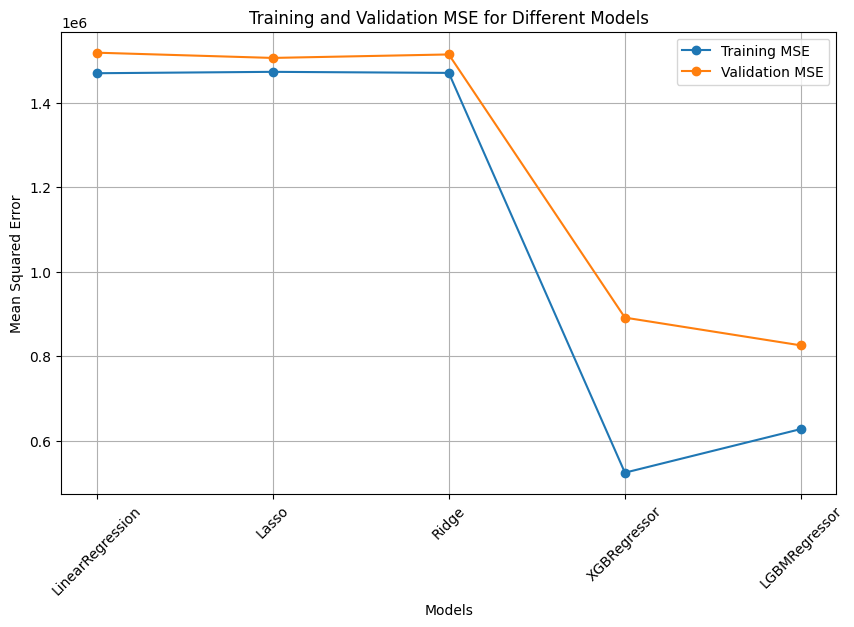

In [ ]:
#결과 시각화
plot_model_performance(models, X_train_processed, y_train, X_val_processed, y_val)

#linerar Regression, Lasso, Ridge는 과적합이 일어나지는 않는 것 같지만 오차가 심함
#xgboost, lightGBM은 과적합 발생 오차도 줄긴 함!

XGBOOst with epochs 확인

[0]	validation_0-rmse:1720.53937	validation_1-rmse:1737.63975
[1]	validation_0-rmse:1408.23180	validation_1-rmse:1438.80660
[2]	validation_0-rmse:1209.02230	validation_1-rmse:1248.41229
[3]	validation_0-rmse:1083.71754	validation_1-rmse:1137.60339
[4]	validation_0-rmse:1006.37804	validation_1-rmse:1068.56426
[5]	validation_0-rmse:958.80940	validation_1-rmse:1030.22493
[6]	validation_0-rmse:919.24780	validation_1-rmse:992.56205


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-rmse:891.53594	validation_1-rmse:971.96628
[8]	validation_0-rmse:873.14549	validation_1-rmse:954.68591
[9]	validation_0-rmse:859.00815	validation_1-rmse:943.91559
[10]	validation_0-rmse:847.01123	validation_1-rmse:935.29378
[11]	validation_0-rmse:838.97492	validation_1-rmse:929.03277
[12]	validation_0-rmse:834.70411	validation_1-rmse:924.81731
[13]	validation_0-rmse:826.89465	validation_1-rmse:921.12485
[14]	validation_0-rmse:821.08531	validation_1-rmse:918.52984
[15]	validation_0-rmse:816.87189	validation_1-rmse:915.07334
[16]	validation_0-rmse:811.90999	validation_1-rmse:912.95560
[17]	validation_0-rmse:809.31026	validation_1-rmse:911.85006
[18]	validation_0-rmse:807.16745	validation_1-rmse:911.21273
[19]	validation_0-rmse:805.19458	validation_1-rmse:910.19595
[20]	validation_0-rmse:801.40742	validation_1-rmse:908.38869
[21]	validation_0-rmse:798.97259	validation_1-rmse:907.93689
[22]	validation_0-rmse:797.51476	validation_1-rmse:907.13659
[23]	validation_0-rmse:795.

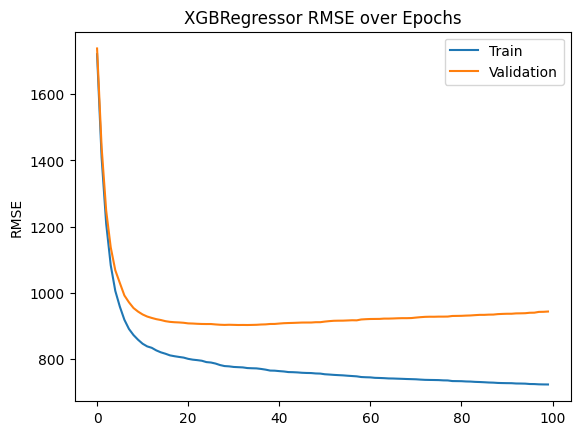

In [ ]:
from xgboost import XGBRegressor
import matplotlib.pyplot as plt

reg_xgb = XGBRegressor()
eval_set = [(X_train_processed, y_train), (X_val_processed, y_val)]
reg_xgb.fit(X_train_processed, y_train, eval_metric="rmse", eval_set=eval_set, verbose=True)

# Accessing the RMSE values stored during training
results = reg_xgb.evals_result()
epochs = len(results['validation_0']['rmse'])
x_axis = range(0, epochs)

# Plotting
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['rmse'], label='Train')
ax.plot(x_axis, results['validation_1']['rmse'], label='Validation')
ax.legend()
plt.ylabel('RMSE')
plt.title('XGBRegressor RMSE over Epochs')
plt.show()


##xgboost early stop 적용
-Xgboost Best Epoch:  33

[0]	validation_0-rmse:1720.53937	validation_1-rmse:1737.63975
[1]	validation_0-rmse:1408.23180	validation_1-rmse:1438.80660
[2]	validation_0-rmse:1209.02230	validation_1-rmse:1248.41229
[3]	validation_0-rmse:1083.71754	validation_1-rmse:1137.60339
[4]	validation_0-rmse:1006.37804	validation_1-rmse:1068.56426
[5]	validation_0-rmse:958.80940	validation_1-rmse:1030.22493
[6]	validation_0-rmse:919.24780	validation_1-rmse:992.56205
[7]	validation_0-rmse:891.53594	validation_1-rmse:971.96628
[8]	validation_0-rmse:873.14549	validation_1-rmse:954.68591
[9]	validation_0-rmse:859.00815	validation_1-rmse:943.91559
[10]	validation_0-rmse:847.01123	validation_1-rmse:935.29378
[11]	validation_0-rmse:838.97492	validation_1-rmse:929.03277
[12]	validation_0-rmse:834.70411	validation_1-rmse:924.81731
[13]	validation_0-rmse:826.89465	validation_1-rmse:921.12485
[14]	validation_0-rmse:821.08531	validation_1-rmse:918.52984
[15]	validation_0-rmse:816.87189	validation_1-rmse:915.07334
[16]	validation_0-rmse:

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:778.73520	validation_1-rmse:904.23670
[30]	validation_0-rmse:776.94063	validation_1-rmse:903.89043
[31]	validation_0-rmse:776.27038	validation_1-rmse:903.51334
[32]	validation_0-rmse:775.58752	validation_1-rmse:903.65249
[33]	validation_0-rmse:773.60189	validation_1-rmse:903.47753
[34]	validation_0-rmse:773.02641	validation_1-rmse:903.76094
[35]	validation_0-rmse:772.64003	validation_1-rmse:904.10260
[36]	validation_0-rmse:770.96853	validation_1-rmse:904.97016
[37]	validation_0-rmse:768.86603	validation_1-rmse:905.39555
[38]	validation_0-rmse:766.03850	validation_1-rmse:906.59543
[39]	validation_0-rmse:765.71242	validation_1-rmse:906.71111
[40]	validation_0-rmse:764.41935	validation_1-rmse:907.88576
[41]	validation_0-rmse:763.34499	validation_1-rmse:908.93019
[42]	validation_0-rmse:761.51470	validation_1-rmse:909.44611
[43]	validation_0-rmse:761.17011	validation_1-rmse:909.82567


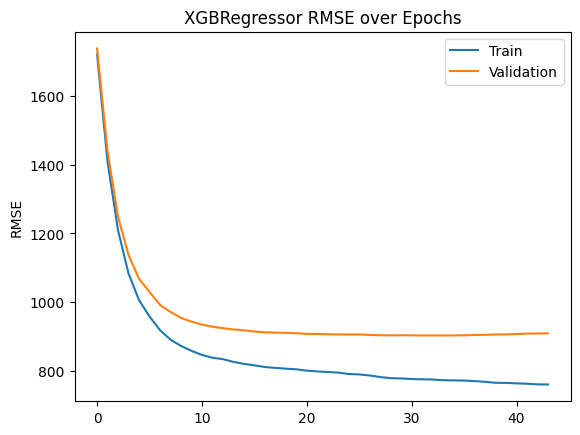

Xgboost Best Epoch:  33


In [ ]:
from xgboost import XGBRegressor
import matplotlib.pyplot as plt


reg_xgb = XGBRegressor()
eval_set = [(X_train_processed, y_train), (X_val_processed, y_val)]
reg_xgb.fit(X_train_processed, y_train, eval_metric="rmse", eval_set=eval_set,
            early_stopping_rounds=10, verbose=True)
# Accessing the RMSE values stored during training
results = reg_xgb.evals_result()
epochs = len(results['validation_0']['rmse'])
x_axis = range(0, epochs)

# Plotting
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['rmse'], label='Train')
ax.plot(x_axis, results['validation_1']['rmse'], label='Validation')
ax.legend()
plt.ylabel('RMSE')
plt.title('XGBRegressor RMSE over Epochs')
plt.show()

best_epoch = reg_xgb.best_iteration
print("Xgboost Best Epoch: ", best_epoch)

#xgboost best_iteration으로 test 진행



In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# 테스트 데이터셋에 대한 예측 수행 (최적의 에포크를 사용)
pred_test = reg_xgb.predict(X_test_processed, iteration_range=(0, best_epoch + 1))

# 테스트 데이터셋에 대한 성능 평가
mse_test = mean_squared_error(y_test, pred_test)
r2_test = r2_score(y_test, pred_test)

# 결과 출력
print("XGBoost Test MSE: ", mse_test)
print("XGBoost Test R² Score: {:.2f}%".format(r2_test * 100))


XGBoost Test MSE:  793445.6526779677
XGBoost Test R² Score: 85.05%


LGBM with epochs 확인

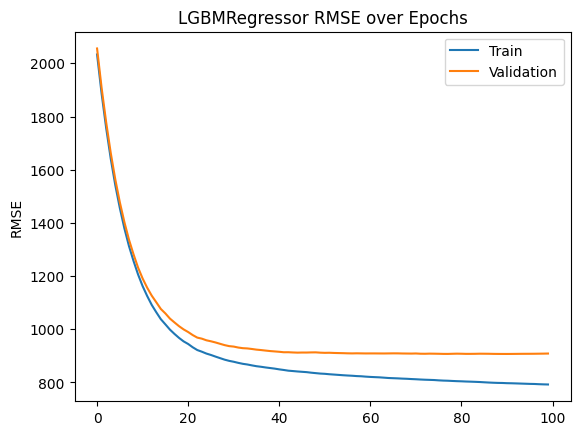

In [ ]:
from lightgbm import LGBMRegressor
import matplotlib.pyplot as plt

# Initialize the model with verbosity settings
reg_lgbm = LGBMRegressor(verbose=-1)  # Set to -1 to suppress output, or a positive integer for verbosity
eval_set = [(X_train_processed, y_train), (X_val_processed, y_val)]

# Fit the model
reg_lgbm.fit(X_train_processed, y_train, eval_metric="rmse", eval_set=eval_set)

# Accessing the RMSE values
results = reg_lgbm.evals_result_
epochs = len(results['training']['rmse'])
x_axis = range(0, epochs)

# Plotting
fig, ax = plt.subplots()
ax.plot(x_axis, results['training']['rmse'], label='Train')
ax.plot(x_axis, results['valid_1']['rmse'], label='Validation')
ax.legend()
plt.ylabel('RMSE')
plt.title('LGBMRegressor RMSE over Epochs')
plt.show()


#light gbm early stop 적용
-Best Iteration:  78

Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[78]	valid_0's rmse: 907.215	valid_0's l2: 823040


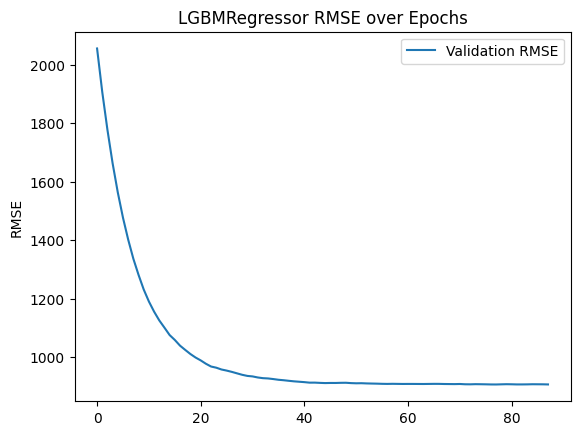

Best Iteration:  78


In [ ]:
from lightgbm import LGBMRegressor, early_stopping
import matplotlib.pyplot as plt

# Initialize the model with verbosity settings
reg_lgbm = LGBMRegressor(verbose=-1)  # Set to -1 to suppress output, or a positive integer for verbosity
eval_set = [(X_val_processed, y_val)]  # Evaluation set for early stopping

# Fit the model with early stopping
reg_lgbm.fit(X_train_processed, y_train, eval_metric="rmse", eval_set=eval_set,
             callbacks=[early_stopping(stopping_rounds=10)])

# Accessing the RMSE values
results = reg_lgbm.evals_result_
epochs = len(results['valid_0']['rmse'])  # Adjust the key based on your evals_result structure
x_axis = range(0, epochs)

# Plotting
fig, ax = plt.subplots()
ax.plot(x_axis, results['valid_0']['rmse'], label='Validation RMSE')
ax.legend()
plt.ylabel('RMSE')
plt.title('LGBMRegressor RMSE over Epochs')
plt.show()

# Best iteration
best_iteration = reg_lgbm.best_iteration_
print("Best Iteration: ", best_iteration)


##best_iteration으로 test 진행

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# 테스트 데이터셋에 대한 예측 수행
pred_test = reg_lgbm.predict(X_test_processed, num_iteration=best_iteration)

# 테스트 데이터셋에 대한 성능 평가
mse_test = mean_squared_error(y_test, pred_test)
r2_test = r2_score(y_test, pred_test)

# 결과 출력
print("Test MSE: ", mse_test)
print("Test R² Score: {:.2f}%".format(r2_test * 100))


Test MSE:  808718.2732912133
Test R² Score: 84.76%


##딥러닝 진행
-사실 데이터가 많지 않아서 성능 향상은 힘듬

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# 데이터 전처리
# 'X_train'과 'X_val', 'X_test'를 정규화합니다.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)  # X_val 데이터에 대한 스케일링
X_test_scaled = scaler.transform(X_test)

# 딥러닝 모델 구성
dl_model = Sequential()
dl_model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
dl_model.add(Dense(32, activation='relu'))
dl_model.add(Dense(1, activation='linear'))

# 모델 컴파일
dl_model.compile(optimizer='adam', loss='mean_squared_error')

# 모델 훈련
dl_model.fit(X_train_scaled, y_train, epochs=100, batch_size=10, verbose=1)

Epoch 1/100
466/466 [==============================] - 9s 4ms/step - loss: 26337492.0000
Epoch 2/100
466/466 [==============================] - 4s 8ms/step - loss: 4694079.0000
Epoch 3/100
466/466 [==============================] - 2s 4ms/step - loss: 2665305.7500
Epoch 4/100
466/466 [==============================] - 2s 4ms/step - loss: 2156696.2500
Epoch 5/100
466/466 [==============================] - 1s 3ms/step - loss: 1917181.5000
Epoch 6/100
466/466 [==============================] - 1s 3ms/step - loss: 1795143.2500
Epoch 7/100
466/466 [==============================] - 1s 3ms/step - loss: 1722937.8750
Epoch 8/100
466/466 [==============================] - 1s 3ms/step - loss: 1674006.1250
Epoch 9/100
466/466 [==============================] - 1s 3ms/step - loss: 1641691.0000
Epoch 10/100
466/466 [==============================] - 1s 3ms/step - loss: 1600186.1250
Epoch 11/100
466/466 [==============================] - 2s 4ms/step - loss: 1591735.5000
Epoch 12/100
466/466 [=======

#훈련 및 검증 데이터

In [ ]:
pred_train_dl = dl_model.predict(X_train_scaled)
pred_val_dl = dl_model.predict(X_val_scaled)

49/49 [==============================] - 0s 3ms/step


In [ ]:
# MSE 계산
mse_train_dl = mean_squared_error(y_train, pred_train_dl)
mse_val_dl = mean_squared_error(y_val, pred_val_dl)

# R² 점수 계산
r2_train_dl = r2_score(y_train, pred_train_dl)
r2_val_dl = r2_score(y_val, pred_val_dl)

# 결과 출력
print("Deep Learning Model Train MSE: ", mse_train_dl)
print("Deep Learning Model Validation MSE: ", mse_val_dl)
print("Deep Learning Model Train R² Score: {:.2f}".format(r2_train_dl))
print("Deep Learning Model Validation R² Score: {:.2f}".format(r2_val_dl))


Deep Learning Model Train MSE:  1284840.1416717586
Deep Learning Model Validation MSE:  1393574.8437975333
Deep Learning Model Train R² Score: 0.73
Deep Learning Model Validation R² Score: 0.72


In [ ]:
# 테스트 데이터에 대한 예측
dl_predictions = dl_model.predict(X_test_scaled)

49/49 [==============================] - 0s 2ms/step


In [ ]:
# 테스트 데이터셋에 대한 성능 평가
mse_test_dl = mean_squared_error(y_test, dl_predictions)
r2_test_dl = r2_score(y_test, dl_predictions)

# 결과 출력
print("Deep Learning Model Test MSE: ", mse_test_dl)
print("Deep Learning Model Test R² Score: {:.2f}".format(r2_test_dl))


Deep Learning Model Test MSE:  1434861.0937814845
Deep Learning Model Test R² Score: 0.73


deep learning early stop 적용

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# 데이터 전처리
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# 딥러닝 모델 구성
dl_model = Sequential()
dl_model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
dl_model.add(Dense(32, activation='relu'))
dl_model.add(Dense(1, activation='linear'))

# 모델 컴파일
dl_model.compile(optimizer='adam', loss='mean_squared_error')

# Early Stopping 콜백 설정
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    verbose=1,
    restore_best_weights=True
)

# 모델 훈련 (Early Stopping 적용)
history = dl_model.fit(
    X_train_scaled, y_train,
    epochs=100,
    batch_size=10,
    verbose=1,
    validation_data=(X_val_scaled, y_val),
    callbacks=[early_stopping]
)

# Best Epoch 찾기
best_epoch = early_stopping.stopped_epoch - early_stopping.patience
print("Best Epoch: ", best_epoch)

# 이제 'dl_model'은 최적의 가중치로 설정되었습니다.
# 이 모델을 사용하여 테스트 데이터에 대한 예측을 수행할 수 있습니다.
dl_predictions = dl_model.predict(X_test_scaled)


Epoch 1/100
466/466 [==============================] - 3s 4ms/step - loss: 25371230.0000 - val_loss: 8535675.0000
Epoch 2/100
466/466 [==============================] - 2s 4ms/step - loss: 4547161.0000 - val_loss: 3013646.7500
Epoch 3/100
466/466 [==============================] - 2s 4ms/step - loss: 2608026.7500 - val_loss: 2231808.2500
Epoch 4/100
466/466 [==============================] - 2s 4ms/step - loss: 2061921.1250 - val_loss: 1926528.8750
Epoch 5/100
466/466 [==============================] - 2s 4ms/step - loss: 1834075.0000 - val_loss: 1808967.6250
Epoch 6/100
466/466 [==============================] - 2s 4ms/step - loss: 1724094.0000 - val_loss: 1725165.1250
Epoch 7/100
466/466 [==============================] - 2s 5ms/step - loss: 1661415.3750 - val_loss: 1680840.3750
Epoch 8/100
466/466 [==============================] - 3s 6ms/step - loss: 1615478.2500 - val_loss: 1647192.1250
Epoch 9/100
466/466 [==============================] - 3s 6ms/step - loss: 1579428.5000 - val_l

In [ ]:
# 테스트 데이터셋에 대한 성능 평가
mse_test_dl = mean_squared_error(y_test, dl_predictions)
r2_test_dl = r2_score(y_test, dl_predictions)

# 결과 출력
print("Deep Learning Model Test MSE: ", mse_test_dl)
print("Deep Learning Model Test R² Score: {:.2f}".format(r2_test_dl))

Deep Learning Model Test MSE:  1397102.836564707
Deep Learning Model Test R² Score: 0.74
